In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import glob
import os
import scipy.stats
from matplotlib import cm
import seaborn as sns
import dask
import matplotlib.colors as mcolors

In [31]:
dask.config.set(**{'array.slicing.split_large_chunks': False})

In [32]:
models = [x.split('/')[-1] for x in glob.glob("/terra/data/cmip5/global/rcp85/*")] 

In [33]:
dic_rcp85 = {}
dic_hist={}
for model in models:
    try:
        rcp85_files = sorted(glob.glob("/terra/data/cmip5/global/rcp85/"+str(model)+"/r1i1p1/mon/native/pr_*"))
        rcp85 = xr.open_mfdataset(rcp85_files, decode_cf=True).sel(lat = -34, method = 'nearest').sel(lon = 18, method = 'nearest').pr
        rcp85 = rcp85.sel(time = slice('2045','2100'))
        rcp85 = rcp85.groupby(rcp85.time.dt.month).mean()
        hist_files = sorted(glob.glob("/terra/data/cmip5/global/historical/"+str(model)+"/r1i1p1/mon/native/pr_*"))
        hist = xr.open_mfdataset(hist_files, decode_cf=True).sel(lat = -34, method = 'nearest').sel(lon = 18, method = 'nearest').pr
        hist = hist.sel(time=slice('1950','2005'))
        hist = hist.groupby(hist.time.dt.month).mean()
        dic_hist[model] = hist
        dic_rcp85[model] = rcp85
    except:
        print(model)

BNU-ESM
CNRM-CM5
EC-EARTH
CESM1-WACCM
MPI-ESM-LR


In [34]:
model = 'BNU-ESM' 

# no historical monthly data 

rcp85_files = sorted(glob.glob("/terra/data/cmip5/global/rcp85/"+str(model)+"/r1i1p1/mon/native/pr_*"))
rcp85 = xr.open_mfdataset(rcp85_files, decode_cf=True).sel(lat = -34, method = 'nearest').sel(lon = 18, method = 'nearest').pr
rcp85 = rcp85.sel(time = slice('2045','2100'))
rcp85 = rcp85.groupby(rcp85.time.dt.month).mean()
hist_files = sorted(glob.glob("/terra/data/cmip5/global/historical/"+str(model)+"/r1i1p1/day/native/pr_*"))

In [35]:
hist = xr.open_mfdataset(hist_files, decode_cf=True).sel(lat = -34, method = 'nearest').sel(lon = 18, method = 'nearest').pr.resample(time='M').mean()
hist = hist.sel(time=slice('1950','2005'))
hist = hist.groupby(hist.time.dt.month).mean()
dic_hist[model] = hist
dic_rcp85[model] = rcp85

In [36]:
"EC-EARTH and CESM1-WACCM - no rcp85 available"

'EC-EARTH and CESM1-WACCM - no rcp85 available'

In [37]:
model = 'MPI-ESM-LR'  

# a problem with the later than 2100 data

rcp85_files = sorted(glob.glob("/terra/data/cmip5/global/rcp85/"+str(model)+"/r1i1p1/mon/native/pr_*"))[0]
rcp85 = xr.open_mfdataset(rcp85_files, decode_cf=True).sel(lat = -34, method = 'nearest').sel(lon = 18, method = 'nearest').pr
rcp85 = rcp85.sel(time = slice('2045','2100'))
rcp85 = rcp85.groupby(rcp85.time.dt.month).mean()
hist_files = sorted(glob.glob("/terra/data/cmip5/global/historical/"+str(model)+"/r1i1p1/mon/native/pr_*"))
hist = xr.open_mfdataset(hist_files, decode_cf=True).sel(lat = -34, method = 'nearest').sel(lon = 18, method = 'nearest').pr
hist = hist.sel(time=slice('1950','2005'))
hist = hist.groupby(hist.time.dt.month).mean()
dic_hist[model] = hist
dic_rcp85[model] = rcp85

In [38]:
model = 'CNRM-CM5'

# a problem with the later than 2100 data

rcp85_files = sorted(glob.glob("/terra/data/cmip5/global/rcp85/"+str(model)+"/r1i1p1/mon/native/pr_*"))[:2]
rcp85 = xr.open_mfdataset(rcp85_files, decode_cf=True).sel(lat = -34, method = 'nearest').sel(lon = 18, method = 'nearest').pr
rcp85 = rcp85.sel(time = slice('2045','2100'))
rcp85 = rcp85.groupby(rcp85.time.dt.month).mean()
hist_files = sorted(glob.glob("/terra/data/cmip5/global/historical/"+str(model)+"/r1i1p1/mon/native/pr_*"))
hist = xr.open_mfdataset(hist_files, decode_cf=True).sel(lat = -34, method = 'nearest').sel(lon = 18, method = 'nearest').pr
hist = hist.sel(time=slice('1950','2005'))
hist = hist.groupby(hist.time.dt.month).mean()
dic_hist[model] = hist
dic_rcp85[model] = rcp85

In [39]:
#NOAA
x = xr.open_mfdataset('/home/pmarsh/NOAA_2deg/prate.mon.mean.nc', decode_cf=True).sel(lat = -34, method = 'nearest').sel(lon = 18, method = 'nearest').prate
x = x.sel(time = slice('1950','2005'))
NOAA = x.groupby(x.time.dt.month).mean()

In [40]:
models = list(set(list(dic_hist.keys())) & set(dic_rcp85.keys()))
len(models)

40

In [41]:
colors=[]
for i in mcolors.CSS4_COLORS:
    colors.append(i)
    
colors = colors[::3][:len(models)]

In [42]:
store_hist = dic_hist
store_rcp85 = dic_rcp85

In [43]:
for model in models:
    for i,n in zip(range(12),[31,28.25,31,30,31,30,31,31,30,31,30,31]):
        dic_hist[model] = dic_hist[model].load()
        dic_hist[model][i] = dic_hist[model][i]*n*86400
        dic_rcp85[model] = dic_rcp85[model].load()
        dic_rcp85[model][i] = dic_rcp85[model][i]*n*86400

In [44]:
for i,n in zip(range(12),[31,28.25,31,30,31,30,31,31,30,31,30,31]):
    NOAA = NOAA.load()
    NOAA[i] = NOAA[i]*n*86400

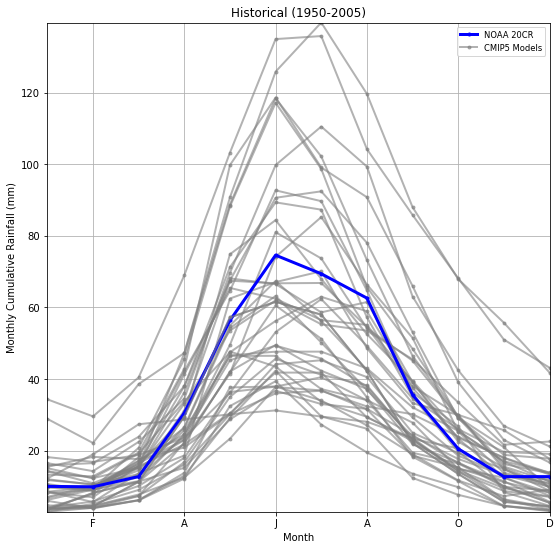

In [45]:
ax = plt.figure(figsize=(9,9))
for model,col in zip(models,colors):
    if model == 'BNU-ESM':
        pass
    else:
        dic_hist[model].plot(marker=".",color='grey',alpha=0.6,lw=2)

NOAA.plot(marker=".",color='blue',label='NOAA 20CR',alpha=1,lw=3)

dic_hist[model].plot(marker=".",color='grey',label='CMIP5 Models',alpha=0.6,lw=2)

plt.title('Historical (1950-2005)')
plt.xlabel('Month')
plt.xticks([2,4,6,8,10,12],['F','A','J','A','O','D'])
plt.ylabel('Monthly Cumulative Rainfall (mm)')
#plt.ylim(0,120)
plt.grid(True)
plt.legend(fontsize='small')
plt.margins(0)
plt.savefig('../PR_OUT/Historical_1950_2005.png',dpi=100)
plt.savefig('../PR_OUT/Historical_1950_2005.pdf')
plt.show()

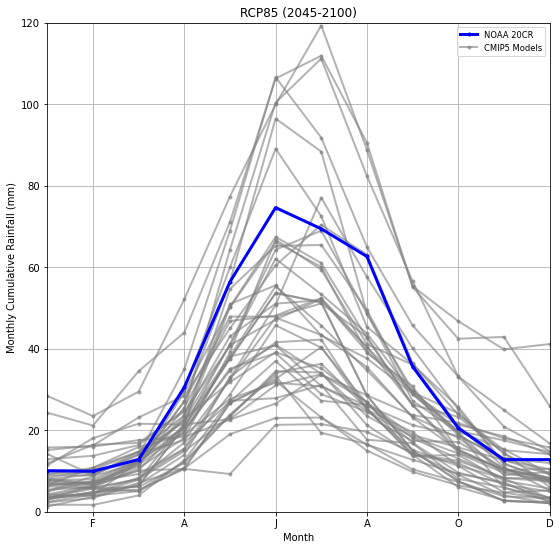

In [47]:
ax = plt.figure(figsize=(9,9))
for model,col in zip(models,colors):
    dic_rcp85[model].plot(marker=".",color='grey',alpha=0.6,lw=2)

NOAA.plot(marker=".",color='blue',label='NOAA 20CR',alpha=1,lw=3)

dic_rcp85[model].plot(marker=".",color='grey',label='CMIP5 Models',alpha=0.6,lw=2)

plt.title('RCP85 (2045-2100)')
plt.xlabel('Month')
plt.xticks([2,4,6,8,10,12],['F','A','J','A','O','D'])
plt.ylabel('Monthly Cumulative Rainfall (mm)')
plt.ylim(0,120)
plt.grid(True)
plt.legend(fontsize='small')
plt.margins(0)
plt.savefig('../PR_OUT/RCP85_2045_2100.png',dpi=100)
plt.savefig('../PR_OUT/RCP85_2045_2100.pdf')
plt.show()

In [66]:
df = pd.DataFrame(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],columns=['month'])
for model in models:
    df = df.join(pd.DataFrame({str(model): dic_rcp85[model].values - dic_hist[model].values}))
    
df = df.set_index('month')

In [67]:
df

,GISS-E2-H,ACCESS1-0,NorESM1-M,GISS-E2-H-CC,CESM1-BGC,CMCC-CESM,FGOALS-s2,MRI-ESM1,IPSL-CM5A-MR,bcc-csm1-1-m,...,FIO-ESM,MRI-CGCM3,MIROC-ESM-CHEM,inmcm4,CNRM-CM5,CanESM2,HadGEM2-ES,NorESM1-ME,GISS-E2-R-CC,GFDL-ESM2G
month,,,,,,,,,,,,,,,,,,,,,
January,-4.617027,-0.055782,-0.834974,-5.937668,-0.737914,-3.035851,-4.284332,-0.805473,-2.471998,-0.177394,...,-6.511095,-4.659825,-3.394227,-6.367845,-3.645014,-1.829902,0.023008,-0.020752,-0.966750,-0.484827
February,-1.033989,0.059351,0.620143,-6.128132,-2.842406,-3.487187,-2.232319,-3.237129,-0.893576,0.258269,...,-4.251827,0.222755,-2.836167,-7.527655,-0.584833,-0.364654,-1.761074,-0.120791,-3.389217,-3.435220
March,-4.135639,-2.946932,-0.821228,-11.007313,-2.881282,-4.638057,-2.200885,-0.754382,-1.264523,-3.507601,...,-5.776803,-5.791774,-4.249482,-1.768210,-6.134655,-2.918080,-2.261643,-1.093009,-0.596212,-5.016338
April,-3.328678,-6.611099,-2.578323,-16.840382,-3.303421,-8.699348,-1.192115,-6.475237,-5.272556,0.977695,...,-7.962231,2.882097,-15.820814,-2.035423,-9.509779,-8.771444,-3.170371,0.066811,-9.503031,-8.611023
May,-19.651314,-13.366175,-2.439096,-25.885132,-12.591919,-21.091087,-10.472609,-10.396435,-13.600870,1.316027,...,-20.201653,-12.258606,-18.651012,-2.560717,-5.339523,-21.818611,-13.070353,-8.637930,-10.507870,-19.688156
June,-19.540672,-3.789742,-10.292912,-34.999298,-4.565037,-23.170311,-10.089048,-14.250008,-26.570730,-2.680206,...,-19.178383,0.337212,-14.338795,-4.335001,0.616272,-15.622631,-3.418591,-6.028839,-10.921700,-7.916466
July,-27.663902,-2.084053,-6.417814,-16.480949,-4.810900,-27.230511,-2.948126,-14.308319,-28.687782,-6.653984,...,-2.537056,-9.113049,-4.023979,-5.996141,0.658340,-6.842102,-6.391171,-7.955532,-3.383465,-6.631229
August,-29.121620,-10.710407,-11.146899,-15.433228,-4.958714,-18.284470,-9.396133,-13.147297,-20.708809,-2.516088,...,-3.093506,-6.060356,-14.681309,-6.303980,-16.961876,-1.485218,-12.811546,-2.903004,-13.263405,-13.725986
September,-32.845917,-4.897264,-2.645700,-30.488792,-4.300449,-4.258371,-2.217474,-9.067574,-10.871637,-4.536909,...,-10.652723,-7.022230,-13.014135,-8.931414,-6.474789,-0.926832,-5.492810,-3.212531,-15.863018,-7.118788


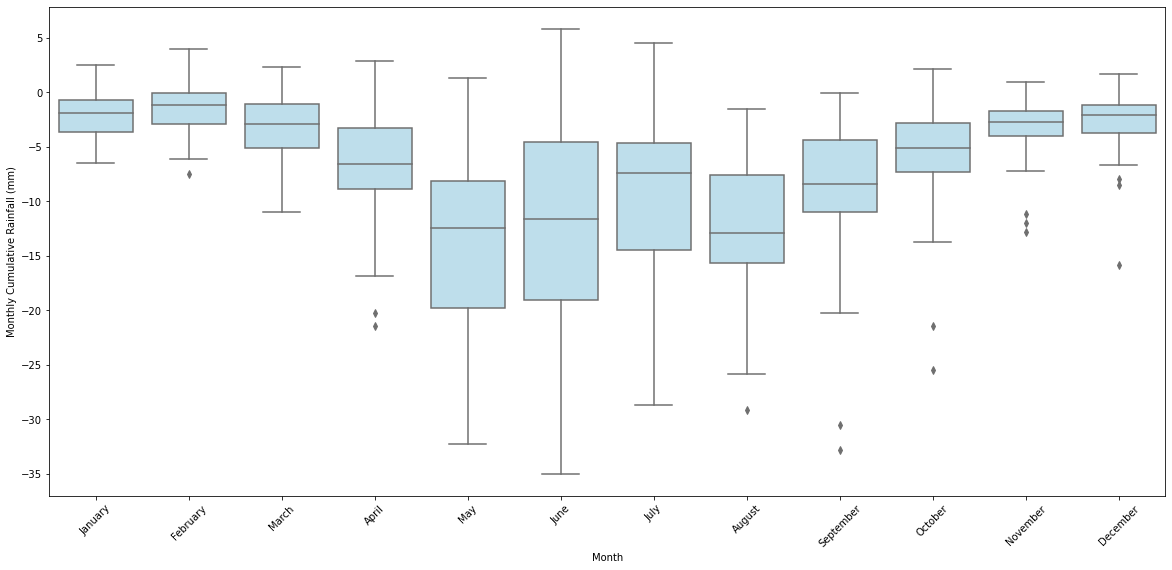

In [68]:
fig = plt.figure(figsize=(20, 9))
ax = sns.boxplot(data=df.T,color="skyblue")
n = plt.setp(ax.get_xticklabels(), rotation=45)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

plt.xlabel('Month')
plt.ylabel('Monthly Cumulative Rainfall (mm)')
plt.savefig('../PR_OUT/RCP85_anom.png',dpi=100)
plt.savefig('../PR_OUT/RCP85_anom.pdf')
plt.show()